In [35]:
#### IMPORTING LIBRARIES ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#### READ DATA ####
path = r"test2.csv "
data = pd.read_csv(path)

# DEFINE DATA

In [3]:
#### define features and target and Theta ####

### adding a new column called ones before the data only one times
data.insert(0, 'Ones', 1)   # add it because when multiply X{1,1; 1,2; 1,3} in Theta{5,10} product is[5+1*10];[5+2*10];[5+3*10]

X=np.array( data.iloc[:,:-1] )                     # X is independent variables matrix
y=np.array( data.iloc[:,-1]  ).reshape(len(X),1)   # y is  dependent  variables matrix

##define theta
shape = (len(data.axes[1])) -1            #length of columns 
theta = np.zeros(shape).reshape(shape,1)  
  
    
data.columns=['ones','X1','X2','X3','X4','Y']#تعريف اسماء الاعمدة 

# SHOWING DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ones    105 non-null    int64  
 1   X1      105 non-null    float64
 2   X2      105 non-null    int64  
 3   X3      105 non-null    int64  
 4   X4      105 non-null    float64
 5   Y       105 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 5.0 KB
That's Information About My Data 
None


That's My First 5 Rows IN My Data 
   ones    X1   X2   X3    X4     Y
0     1  3.45  643  589  3.76  3.52
1     1  2.78  558  512  2.87  2.91
2     1  2.52  583  503  2.54  2.40
3     1  3.67  685  602  3.83  3.47
4     1  3.24  592  538  3.29  3.47


That's The Describtion Of My Data 
        ones          X1          X2          X3          X4           Y
count  105.0  105.000000  105.000000  105.000000  105.000000  105.000000
mean     1.0    3.076381  623.076190  598.600000    3.128000    3.172857
st

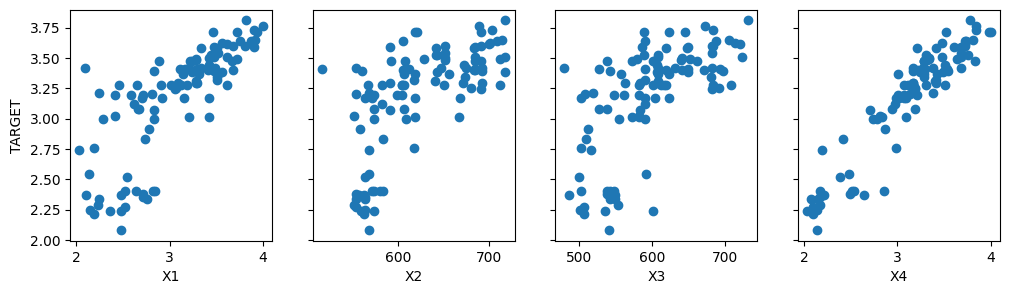

In [4]:
print(f"That's Information About My Data \n{data.info()}\n\n")

print(f"That's My First 5 Rows IN My Data \n{data.head()}\n\n")

print(f"That's The Describtion Of My Data \n{data.describe()}\n\n")

#### DATA SCATTER ####
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(data.iloc[:,i+1],data.iloc[:,-1])
    ax[i].set_xlabel(f"X{i+1}")
ax[0].set_ylabel("TARGET")
plt.show()

# This Step To Scalling The Data (You Can Skip It If Your Data Is OK) 

In [5]:
### Scale/normalize the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# X_norm1 = scaler.fit_transform(X[:,1:2])
X_norm2 = scaler.fit_transform(X[:,2:3])
X_norm3 = scaler.fit_transform(X[:,3:4])
# X_norm4 = scaler.fit_transform(X[:,4:5])


###Convert data to new data after scalling

X[:,2:3]=X_norm2
X[:,3:4]=X_norm3


# print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm1,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm2,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm3,axis=0)}")
# print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm4,axis=0)}")

Peak to Peak range by column in Normalized X:[3.77542997]
Peak to Peak range by column in Normalized X:[4.02150807]


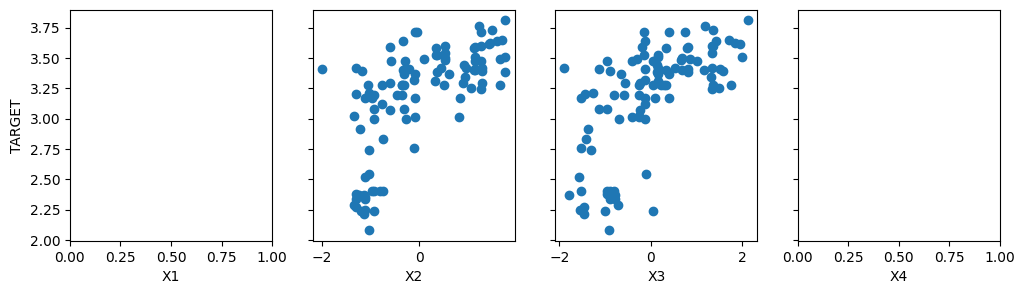

In [6]:
#### DATA SHOW After Normalization ####


fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
# ax[0].scatter(X_norm1,data.Y)
ax[1].scatter(X_norm2,data.Y)
ax[2].scatter(X_norm3,data.Y)
# ax[3].scatter(X_norm4,data.Y)

ax[0].set_xlabel("X1")
ax[1].set_xlabel("X2")
ax[2].set_xlabel("X3")
ax[3].set_xlabel("X4")

ax[0].set_ylabel("TARGET")
plt.show()

# ------------------------------------------------------------------------------------------------------------

<a name="toc_15456_3"></a>
# Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

# <a name="toc_15456_4"></a>
# Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [7]:
##First Step Convert to MAtrices 
##to be able to calc in next steps

X=np.matrix(X)
y=np.matrix(y)
theta=np.matrix(theta )

In [8]:
# #### COST FUNCTION ####
def computeCost(X, y, theta):
    
    f_x=(X * theta)
    
    summation=np.sum(   np.power ( (f_x -y ), 2)   ) 
    
    m=X.shape[0] # number of values
    return summation / (2 * m)

print('COST VALUE = ' , round(computeCost(X, y, theta),3))

COST VALUE =  5.133


# <a name="toc_15456_5"></a>
# 5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0....n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [78]:
#### GRADIEN DESCENT ####
def gradientDescent(X, y, theta, alpha, iters):
    global start,end

    
    start = time.time()

    New_Theta   = np.matrix(np.zeros(theta.shape))  # same shape of my Theta matrix
    parameters  = int(theta.ravel().shape[1])       #get how much theta that i have 
    costs       = np.zeros(iters) 
    m           = len(X) 
    
    for i in range(iters):
        
        error = X.dot(theta) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[j])
            New_Theta[j,0] = theta[j,0] - ((alpha / m) * np.sum(term))
            
        theta    = New_Theta
        costs[i] = computeCost(X, y, theta)
    
    end = time.time()
    
    return theta, costs
    
    

# initialize variables for learning rate and iterations
alpha = 0.001
iters = 50

# perform gradient descent to "fit" the model parameters
New_theta, costs = gradientDescent(X, y, theta, alpha, iters)

def New_Theta():
    c=0
    for i in New_theta:
        print(f"Theta {c} : {round((float(i)),5)}")
        c+=1
New_Theta()

print('\nFinal Cost = ' , round(computeCost(X, y, New_theta) , 4)) # final cost

print(f"\nTIME IS : {round((end-start),4)} Sec.")

Theta 0 : 0.58574
Theta 1 : 0.28155
Theta 2 : 0.26304
Theta 3 : 0.67486
Theta 4 : 0.4157

Final Cost =  0.4728

TIME IS : 0.0196 Sec.


# DRAWING COST FUNCTION

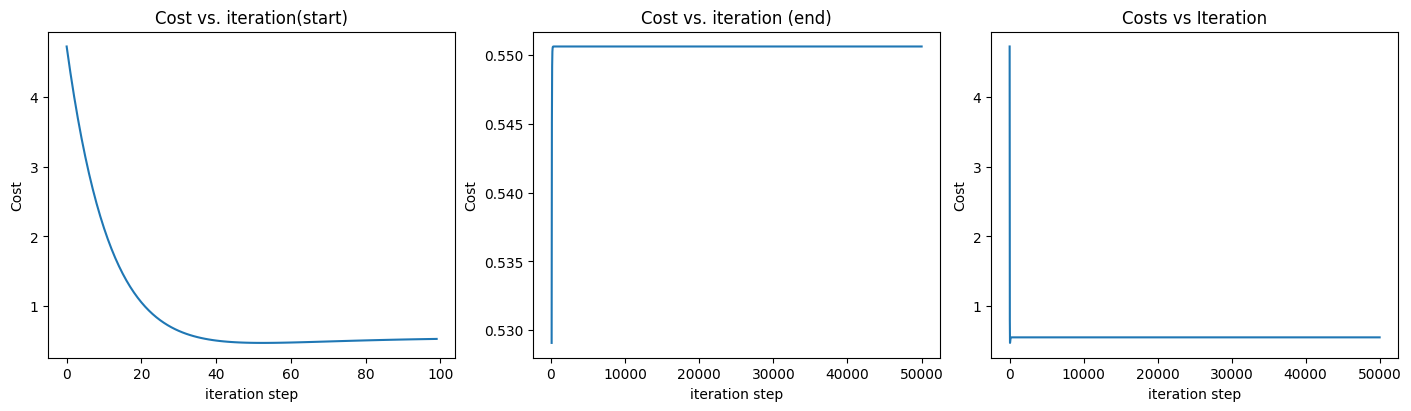

In [33]:
# plot cost versus iteration  
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, constrained_layout=True, figsize=(14,4))
ax1.plot(costs[:100])
ax2.plot(100 + np.arange(len(costs[100:])), costs[100:])
ax3.plot(costs)
##descripe shapes
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)");ax3.set_title("Costs vs Iteration")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')  ; ax3.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') ; ax3.set_xlabel('iteration step') 
plt.show()

<AxesSubplot: xlabel='X1', ylabel='Y'>

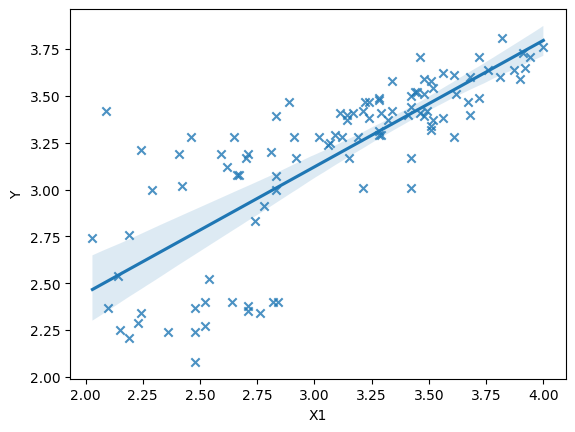

In [11]:
sns.regplot(x='X1',y='Y', data=data,marker='x')

# CREATE A MODEL OF PREDECTION


#=====================================================#
Predect of 10,12,54,11 is :[[3.11467811]]
Predect of 15,11,22,41 is :[[39.59292832]]
Predect of 20,14,51,12 is :[[49.30558822]]
#=====================================================#


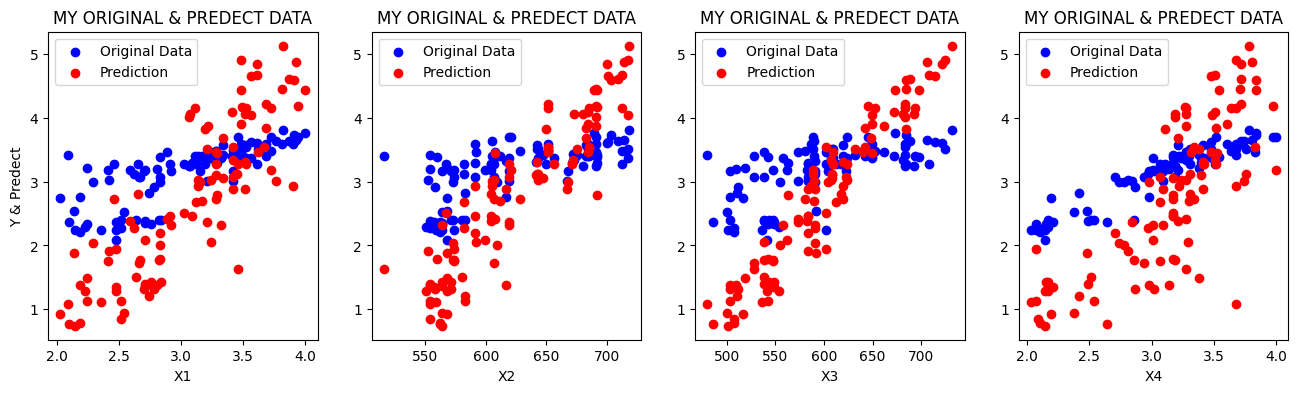

In [13]:
### MAKING MODEL ###

print("#=====================================================#")

# You can predect any value you want like 15 here 
# only put it and wait the result
print(f"Predect of 10,12,54,11 is :{np.dot([ 1 ,  3.45 ,0.37238093, -0.15320031,3.76  ],New_theta)}")#actual output is 3.52
print(f"Predect of 15,11,22,41 is :{np.dot([1,15,11,22,41],New_theta)}")
print(f"Predect of 20,14,51,12 is :{np.dot([1,20,14,51,12],New_theta)}")

print("#=====================================================#")
### draw the Predect shape ###
Predect_Values=np.array(np.dot(X,New_theta))

Predect_Values1=np.array(np.dot(X,New_theta))
Predect_Values2=np.array(np.dot(X,New_theta))
Predect_Values3=np.array(np.dot(X,New_theta))
Predect_Values4=np.array(np.dot(X,New_theta))

fig, shape = plt.subplots(1,4,figsize=(16,4))

shape[0].scatter(data.X1,data.Y,c='b', label='Original Data')
shape[1].scatter(data.X2,data.Y,c='b', label='Original Data')
shape[2].scatter(data.X3,data.Y,c='b', label='Original Data')
shape[3].scatter(data.X4,data.Y,c='b', label='Original Data')

shape[0].scatter(data.X1,Predect_Values,c='r', label='Prediction')
shape[1].scatter(data.X2,Predect_Values,c='r', label='Prediction')
shape[2].scatter(data.X3,Predect_Values,c='r', label='Prediction')
shape[3].scatter(data.X4,Predect_Values,c='r', label='Prediction')


#describ the shape

shape[0].legend(loc=0)
shape[0].set_xlabel('X1')
shape[0].set_ylabel('Y & Predect')
shape[0].set_title('MY ORIGINAL & PREDECT DATA')

shape[1].legend(loc=0)
shape[1].set_xlabel('X2')
shape[1].set_title('MY ORIGINAL & PREDECT DATA')
                  
shape[2].legend(loc=0)
shape[2].set_xlabel('X3')
shape[2].set_title('MY ORIGINAL & PREDECT DATA')
                  
shape[3].legend(loc=0)
shape[3].set_xlabel('X4')

shape[3].set_title('MY ORIGINAL & PREDECT DATA')

plt.show()

# SCORE OF ERROR

In [24]:
# Import Libraries
from sklearn.metrics import mean_absolute_error 
## 
#----------------------------------------------------
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(data.Y, Predect_Values) # it can be raw_values
print('Mean Absolute Error Value is : ',round(MAEValue,4))

Mean Absolute Error Value is :  0.8333


In [25]:
#Import Libraries
from sklearn.metrics import mean_squared_error 
#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(data.Y, Predect_Values) # it can be raw_values
print('Mean Squared Error Value is : ',round(MSEValue,4))

Mean Squared Error Value is :  0.9456


In [26]:
#Import Libraries
from sklearn.metrics import median_absolute_error
#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(data.Y, Predect_Values)
print('Median Squared Error Value is : ',round(MdSEValue,4))

Median Squared Error Value is :  0.7975


# THE END
